In [4]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [5]:
import pandas as pd
import numpy as np

In [6]:
dataset=pd.read_csv(url, header=None, na_values='?', skipinitialspace=True)

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
columns=[1,3, 5,6,7,8,9,13,14]

In [9]:
dataset.isnull().sum().sum()

4262

In [10]:
dataset=dataset.dropna()

In [11]:
dataset.isnull().sum().sum()

0

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
    dataset[i]=le.fit_transform(dataset[i])

In [13]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [14]:
target=dataset[14]
data=dataset.drop(columns=[14])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data, target, test_size=0.3)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [17]:
p1=Pipeline([('sc', StandardScaler()),('lda', LinearDiscriminantAnalysis()),('lr', LogisticRegression(penalty='l2'))])

In [18]:
from sklearn.model_selection import learning_curve

In [19]:
train_sizes, train_score, test_score=learning_curve(estimator=p1, X=x_train, y=y_train, cv=10)   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [20]:
print(train_sizes)

[ 1900  6175 10450 14725 19001]


In [21]:
train_mean=np.mean(train_score, axis=1)

In [22]:
train_std=np.std(train_score, axis=1)

In [23]:
test_mean=np.mean(test_score, axis=1)
test_std=np.std(test_score, axis=1)

In [24]:
import matplotlib.pyplot as plt


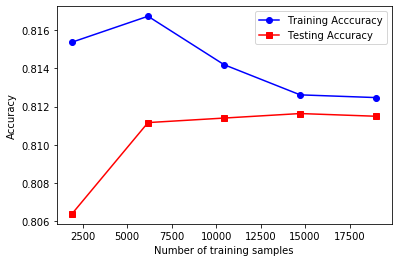

In [25]:
plt.plot(train_sizes, train_mean, c='blue', marker='o', label="Training Acccuracy")

plt.plot(train_sizes, test_mean, c='red', marker='s', label="Testing Accuracy")
plt.legend()

plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.show()

In [26]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [27]:
target1=dataset[14]
data1=dataset.drop(columns=[14])

In [28]:
x_train1, x_test1, y_train1, y_test1=train_test_split(data1, target1, test_size=0.3)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
#p1=Pipeline([('sc', StandardScaler()), ('svc', SVC())])


In [32]:
sc=StandardScaler()
train1_sc=sc.fit_transform(x_train1)

In [33]:
svc=SVC()

In [34]:
param_range=[0.001, 0.01,0.1, 1.0, 10.0, 100.0]
param_grid=[{'C': param_range, 'kernel': ['linear']}, {'C': param_range, 'gamma': param_range, 'kernel': ['rbf']}]

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
gs=GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=10)

In [ ]:
gs=gs.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(x_train, y_train))